In [1]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [3]:
pio.renderers.default = "browser"

In [1]:
import pandas as pd

fg = pd.read_csv("full_grouped.csv")
cw = pd.read_csv("cleaned_country_wise_latest.csv")
wm = pd.read_csv("worldometer_data.csv")

# Check keys
print(fg.columns.tolist())
print(cw.columns.tolist())
print(wm.columns.tolist())

['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'WHO Region']
['country/region', 'confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered', 'deaths_/_100_cases', 'recovered_/_100_cases', 'deaths_/_100_recovered', 'confirmed_last_week', '1_week_change', '1_week_%_increase', 'who_region', 'CFR']
['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region']


In [2]:
fg = fg.rename(columns={"Country/Region": "country"})
cw = cw.rename(columns={"country/region": "country"})
wm = wm.rename(columns={"Country/Region": "country"})

In [3]:
fg["Date"] = pd.to_datetime(fg["Date"])

fg_latest = (
    fg.sort_values("Date")
      .groupby("country")
      .tail(1)
      .reset_index(drop=True)
)

fg_latest.head()

,Date,country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-07-27,Norway,9132,255,8752,125,15,0,0,Europe
1,2020-07-27,North Macedonia,10213,466,5564,4183,127,6,137,Europe
2,2020-07-27,Nigeria,41180,860,18203,22117,648,2,829,Africa
3,2020-07-27,Nepal,18752,48,13754,4950,139,3,626,South-East Asia
4,2020-07-27,Nicaragua,3439,108,2492,839,0,0,0,Americas


In [4]:
set_fg = set(fg_latest["country"])
set_cw = set(cw["country"])
set_wm = set(wm["country"])

print("In FG but not in CW:", list(set_fg - set_cw)[:10])
print("In CW but not in FG:", list(set_cw - set_fg)[:10])

print("In FG but not in WM:", list(set_fg - set_wm)[:10])
print("In WM but not in FG:", list(set_wm - set_fg)[:10])

In FG but not in CW: []
In CW but not in FG: []
In FG but not in WM: ['West Bank and Gaza', 'US', 'Saint Vincent and the Grenadines', 'Brunei', 'South Korea', 'Kosovo', 'Holy See', 'Taiwan*', 'Congo (Kinshasa)', 'Central African Republic']
In WM but not in FG: ['Hong Kong', 'Cayman Islands', 'Montserrat', 'Aruba', 'Bermuda', 'Caribbean Netherlands', 'Myanmar', 'Saint Martin', 'Isle of Man', 'Diamond Princess']


In [5]:
name_map = {
    "United Kingdom": "UK",
    "United Arab Emirates": "UAE",
    "Burma": "Myanmar",
    "Congo (Kinshasa)": "Congo",
    "Congo (Brazzaville)": "Congo",
    "Cote d'Ivoire": "Cote d'Ivoire",
    "Central African Republic": "Central African Republic",
    "Saint Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Kosovo": "Kosovo",
    "Brunei": "Brunei",
}

fg_latest["country"] = fg_latest["country"].replace(name_map)
cw["country"] = cw["country"].replace(name_map)
wm["country"] = wm["country"].replace(name_map)

In [11]:
set_fg = set(fg_latest["country"])
set_cw = set(cw["country"])
set_wm = set(wm["country"])

print("In FG but not in WM:", list(set_fg - set_wm))
print("In WM but not in FG:", list(set_wm - set_fg))

In FG but not in WM: ['West Bank and Gaza', 'US', 'Brunei', 'South Korea', 'Kosovo', 'Holy See', 'Taiwan*', 'Central African Republic', "Cote d'Ivoire", 'China', 'Saint Vincent and the Grenadines']
In WM but not in FG: ['Hong Kong', 'Cayman Islands', 'Montserrat', 'Aruba', 'Bermuda', 'Caribbean Netherlands', 'Saint Martin', 'Isle of Man', 'Diamond Princess', 'French Guiana', 'Réunion', 'Brunei ', 'Martinique', 'Taiwan', 'S. Korea', 'Falkland Islands', 'Mayotte', 'DRC', 'Curaçao', 'New Caledonia', 'Turks and Caicos', 'CAR', 'Gibraltar', 'St. Vincent Grenadines', 'Palestine', 'Vatican City', 'Sint Maarten', 'Faeroe Islands', 'French Polynesia', 'Channel Islands', 'Guadeloupe', 'Ivory Coast', 'Macao', 'USA']


In [13]:
name_map = {
    
    "US": "USA",

    "South Korea": "S. Korea",

    "Congo (Kinshasa)": "DRC",
    "Congo (Brazzaville)": "Congo",

    "Cote d'Ivoire": "Ivory Coast",

    "United States": "USA",
    "United Kingdom": "UK",

    "Holy See": "Vatican City",

    "West Bank and Gaza": "Palestine",

    "Taiwan*": "Taiwan",

    "Central African Republic": "CAR",

    "Saint Vincent and the Grenadines": "St. Vincent Grenadines",

    "China": "China",

    "Brunei": "Brunei "
}

fg_latest["country"] = fg_latest["country"].replace(name_map)
cw["country"] = cw["country"].replace(name_map)
wm["country"] = wm["country"].replace(name_map)

In [15]:
non_countries = [
    "Diamond Princess"
]

wm = wm[~wm["country"].isin(non_countries)]

In [17]:
set_fg = set(fg_latest["country"])
set_wm = set(wm["country"])

print("In FG but not in WM:", list(set_fg - set_wm))
print("In WM but not in FG:", list(set_wm - set_fg))

In FG but not in WM: ['China', 'Kosovo']
In WM but not in FG: ['Hong Kong', 'Cayman Islands', 'Montserrat', 'Aruba', 'Bermuda', 'Caribbean Netherlands', 'Saint Martin', 'Isle of Man', 'French Guiana', 'Réunion', 'Martinique', 'Falkland Islands', 'Mayotte', 'DRC', 'Curaçao', 'New Caledonia', 'Turks and Caicos', 'Gibraltar', 'Sint Maarten', 'Faeroe Islands', 'French Polynesia', 'Channel Islands', 'Guadeloupe', 'Macao']


In [19]:
merged_1 = fg_latest.merge(cw, on="country", how="inner", suffixes=("_fg", "_cw"))
merged_all = merged_1.merge(wm, on="country", how="inner")

merged_all.shape
merged_all.head()

,Date,country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region_x,...,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region_y
0,2020-07-27,Norway,9132,255,8752,125,15,0,0,Europe,...,NaN,8857.0,NaN,355.0,3.0,1745.0,47.0,472841.0,87152.0,Europe
1,2020-07-27,North Macedonia,10213,466,5564,4183,127,6,137,Europe,...,NaN,7480.0,NaN,3402.0,3.0,5471.0,248.0,109946.0,52773.0,Europe
2,2020-07-27,Nigeria,41180,860,18203,22117,648,2,829,Africa,...,NaN,32430.0,NaN,11884.0,7.0,219.0,5.0,306894.0,1485.0,Africa
3,2020-07-27,Nepal,18752,48,13754,4950,139,3,626,South-East Asia,...,NaN,15389.0,NaN,6296.0,NaN,745.0,2.0,731977.0,25079.0,South-EastAsia
4,2020-07-27,Nicaragua,3439,108,2492,839,0,0,0,Americas,...,NaN,2913.0,NaN,866.0,NaN,588.0,19.0,NaN,NaN,Americas


In [21]:
merged_all.columns.tolist()

['Date',
 'country',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'New cases',
 'New deaths',
 'New recovered',
 'WHO Region_x',
 'confirmed',
 'deaths',
 'recovered',
 'active',
 'new_cases',
 'new_deaths',
 'new_recovered',
 'deaths_/_100_cases',
 'recovered_/_100_cases',
 'deaths_/_100_recovered',
 'confirmed_last_week',
 '1_week_change',
 '1_week_%_increase',
 'who_region',
 'CFR',
 'Continent',
 'Population',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop',
 'WHO Region_y']

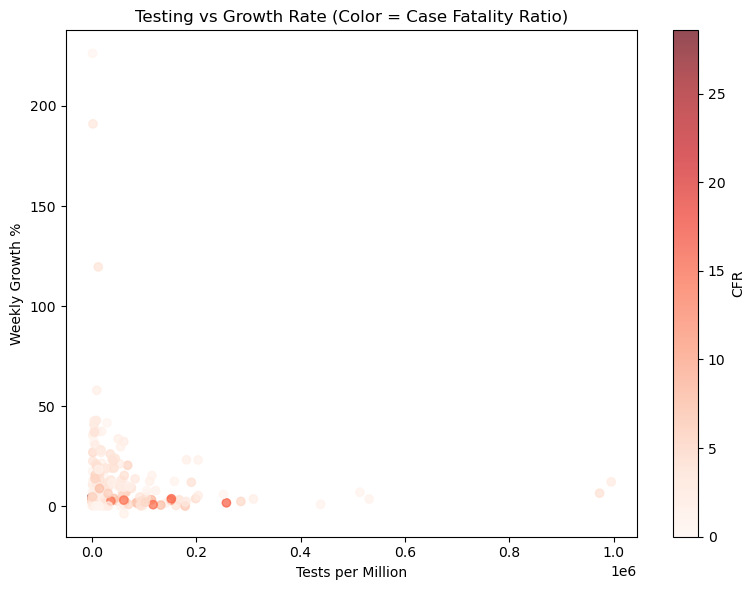

In [23]:
import matplotlib.pyplot as plt

subset = merged_all[["Tests/1M pop", "1_week_%_increase", "CFR"]].dropna()

plt.figure(figsize=(8,6))
plt.scatter(subset["Tests/1M pop"], subset["1_week_%_increase"], 
            c=subset["CFR"], cmap="Reds", alpha=0.7)

plt.xlabel("Tests per Million")
plt.ylabel("Weekly Growth %")
plt.title("Testing vs Growth Rate (Color = Case Fatality Ratio)")
plt.colorbar(label="CFR")
plt.tight_layout()
plt.show()

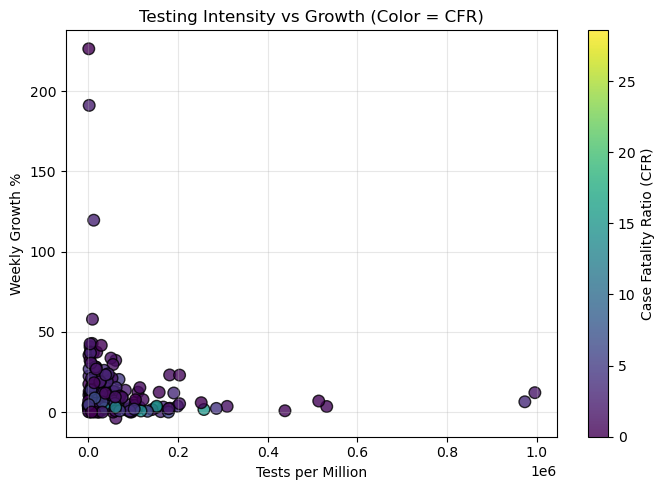

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

sc = plt.scatter(
    subset.iloc[:, 0],   
    subset.iloc[:, 1],   
    c=subset.iloc[:, 2], 
    cmap="viridis",
    alpha=0.8,
    edgecolors="black",
    s=70
)

plt.xlabel("Tests per Million")
plt.ylabel("Weekly Growth %")
plt.title("Testing Intensity vs Growth (Color = CFR)")
plt.colorbar(sc, label="Case Fatality Ratio (CFR)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# !pip install plotly

In [33]:
!pip install mplcursors

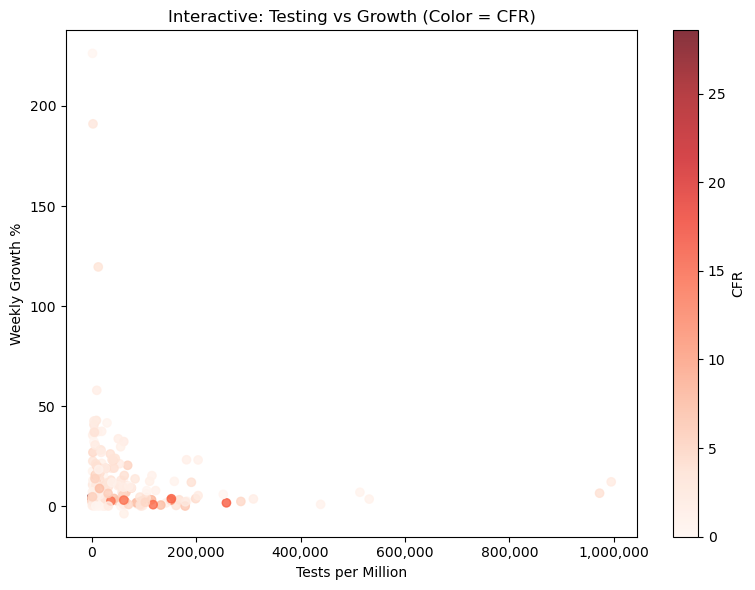

In [34]:
import mplcursors
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

x_col = "Tests/1M pop"          
y_col = "1_week_%_increase"    
label_col = "country"

subset = merged_all[[x_col, y_col, "CFR", label_col]].dropna()

plt.figure(figsize=(8,6))
sc = plt.scatter(subset[x_col], subset[y_col], c=subset["CFR"], cmap="Reds", alpha=0.8)

plt.xlabel("Tests per Million")
plt.ylabel("Weekly Growth %")
plt.title("Interactive: Testing vs Growth (Color = CFR)")
plt.colorbar(sc, label="CFR")

ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

cursor = mplcursors.cursor(sc, hover=True)
@cursor.connect("add")
def on_add(sel):
    idx = sel.index
    sel.annotation.set_text(
        f"{subset.iloc[idx][label_col]}\n"
        f"Tests/1M: {subset.iloc[idx][x_col]:,.0f}\n"
        f"Weekly %: {subset.iloc[idx][y_col]:.1f}\n"
        f"CFR: {subset.iloc[idx]['CFR']:.2%}"
    )

plt.tight_layout()
plt.show()

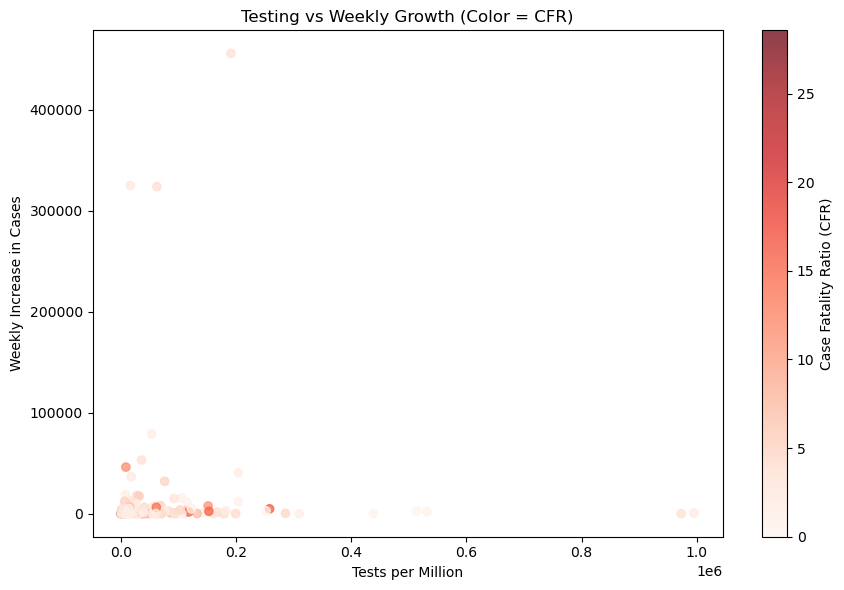

In [37]:
import mplcursors
import matplotlib.pyplot as plt


subset = merged_all[[
    "country", 
    "Tests/1M pop", 
    "1_week_change",  
    "CFR"
]].dropna()

fig, ax = plt.subplots(figsize=(9, 6))

sc = ax.scatter(
    subset["Tests/1M pop"],
    subset["1_week_change"],
    c=subset["CFR"],
    cmap="Reds",
    alpha=0.75
)

ax.set_xlabel("Tests per Million")
ax.set_ylabel("Weekly Increase in Cases")
ax.set_title("Testing vs Weekly Growth (Color = CFR)")

cbar = plt.colorbar(sc)
cbar.set_label("Case Fatality Ratio (CFR)")

cursor = mplcursors.cursor(sc, hover=True)

@cursor.connect("add")
def on_add(sel):
    idx = sel.index
    country = subset.iloc[idx]["country"]
    tests = subset.iloc[idx]["Tests/1M pop"]
    wk = subset.iloc[idx]["1_week_change"]
    cfr = subset.iloc[idx]["CFR"]
    sel.annotation.set(text=f"{country}\nTests/M: {tests:,.0f}\nWeek Δ: {wk:,.0f}\nCFR: {cfr:.2%}")

plt.tight_layout()
plt.show()